[View in Colaboratory](https://colab.research.google.com/github/NicknameSoHard/Open_course_ML/blob/master/ML_homework_7.ipynb)

In [0]:
!mkdir drive/
!mkdir drive/Open_course_ML/

!wget "https://drive.google.com/uc?export=download&id=14pz6jO9T3Roa-9ZmWhK-b7cI3hluvHlN" -P drive/Open_course_ML -O drive/Open_course_ML/samsung_train.txt
!wget "https://drive.google.com/uc?export=download&id=1-DJYDqZUg4pQjT6TKTH6UlgBXWe9rgJ4" -P drive/Open_course_ML -O drive/Open_course_ML/samsung_train_labels.txt
!wget "https://drive.google.com/uc?export=download&id=1AkY-VY3W80059ilf1XCd6LBw6O6jmVbH" -P drive/Open_course_ML -O drive/Open_course_ML/samsung_test.txt
!wget "https://drive.google.com/uc?export=download&id=1nUeFoXnSG2jbKsBEklo6GmzxTR5K7RZK" -P drive/Open_course_ML -O drive/Open_course_ML/samsung_test_labels.txt

In [0]:
!pip install tqdm

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import adjusted_rand_score

RANDOM_STATE = 17

In [0]:
X_train = np.loadtxt("drive/Open_course_ML/samsung_train.txt")
y_train = np.loadtxt("drive/Open_course_ML/samsung_train_labels.txt").astype(int)

X_test = np.loadtxt("drive/Open_course_ML/samsung_test.txt")
y_test = np.loadtxt("drive/Open_course_ML/samsung_test_labels.txt").astype(int)

In [0]:
# Проверим размерности
assert(X_train.shape == (7352, 561) and y_train.shape == (7352,))
assert(X_test.shape == (2947, 561) and y_test.shape == (2947,))

Для кластеризации нам не нужен вектор ответов, поэтому будем работать с объединением обучающей и тестовой выборок. Объедините *X_train* с *X_test*, а *y_train* – с *y_test*. 

In [0]:
# Ваш код здесь
X = np.concatenate((X_train, X_test) )
y = np.concatenate((y_train, y_test) )

Определим число уникальных значений меток целевого класса.

In [253]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

In [254]:
n_classes = np.unique(y).size
n_classes

6

[Эти метки соответствуют:](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names)
- 1 - ходьбе
- 2 - подъему вверх по лестнице
- 3 - спуску по лестнице
- 4 - сидению
- 5 - стоянию
- 6 - лежанию

*уж простите, если звучание этих существительных кажется корявым :)*

Отмасштабируйте выборку с помощью `StandardScaler` с параметрами по умолчанию.

In [0]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Понижаем размерность с помощью PCA, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Используйте отмасштабированную выборку и зафиксируйте random_state (константа RANDOM_STATE).

In [259]:
pca = PCA(random_state=RANDOM_STATE)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca

array([[-1.63809798e+01,  1.99508307e+00,  3.41569023e+00, ...,
         7.41776265e-17, -7.02858310e-16,  9.15652052e-16],
       [-1.55821733e+01,  1.18259368e+00, -3.21206753e-01, ...,
         1.34913281e-16,  6.08771227e-15, -4.81887648e-16],
       [-1.54239892e+01,  2.24316643e+00, -1.23778356e+00, ...,
         2.16963995e-16, -3.41378296e-15, -2.04888331e-17],
       ...,
       [ 1.18468531e+01, -3.43356502e+00,  2.18801926e+00, ...,
        -1.50709483e-16, -1.22741531e-15, -2.57252157e-16],
       [ 8.20668637e+00, -4.38648876e+00,  1.31871955e+00, ...,
        -2.63350791e-16, -8.37654440e-15,  4.04508384e-16],
       [ 9.31117251e+00, -3.98616133e+00,  1.93301747e+00, ...,
        -6.33610295e-17, -4.79431333e-15,  2.77592002e-16]])

**Вопрос 1:**<br>
Какое минимальное число главных компонент нужно выделить, чтобы объяснить 90% дисперсии исходных (отмасштабированных) данных?

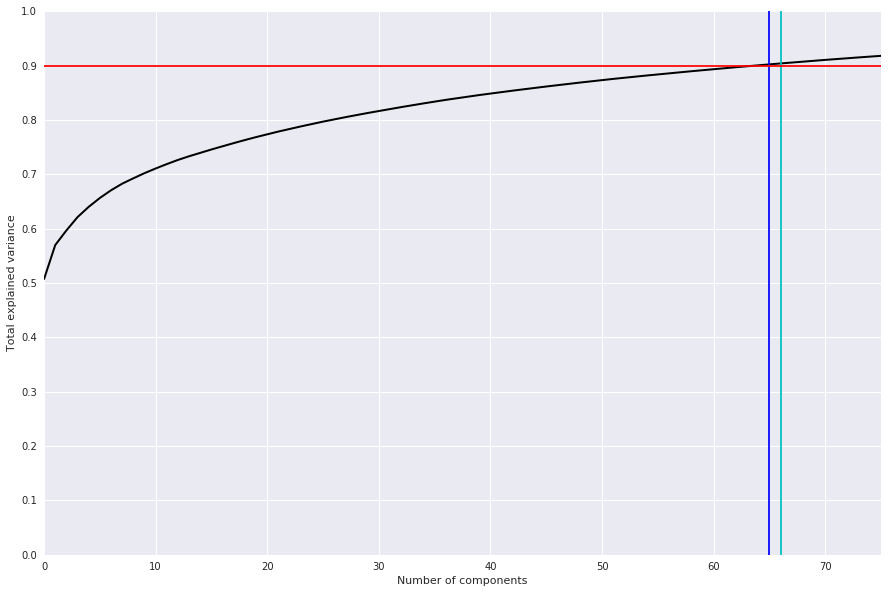

In [260]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(15,10))
plt.plot( cumsum , color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 75)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
#Вопрос 1
plt.axvline(65, c='b')
plt.axvline(66, c='c')
plt.axhline(0.9, c='r')

**Варианты:**
- 56 
- **65**
- 66
- 193

**Вопрос 2:**<br>
Сколько процентов дисперсии приходится на первую главную компоненту? Округлите до целых процентов. 

**Варианты:**
- 45
- **51**
- 56
- 61

Визуализируйте данные в проекции на первые две главные компоненты.

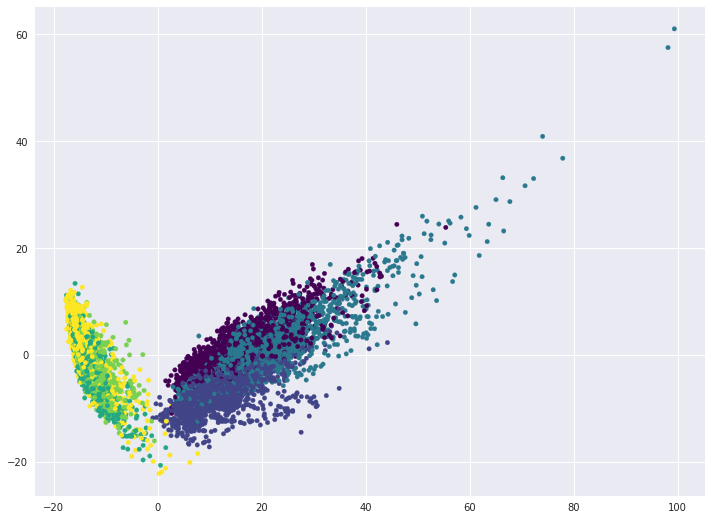

In [261]:
plt.scatter(X_pca[:, 0], X_pca[:, 1] , c=y, s=20, cmap='viridis');

**Вопрос 3:**<br>
Если все получилось правильно, Вы увидите сколько-то кластеров, почти идеально отделенных друг от друга. Какие виды активности входят в эти кластеры?<br>

**Ответ:**
- 1 кластер: все 6 активностей
- **2 кластера: (ходьба, подъем вверх по лестнице, спуск по лестнице) и (сидение, стояние, лежание)**
- 3 кластера: (ходьба), (подъем вверх по лестнице, спуск по лестнице) и (сидение, стояние, лежание)
- 6 кластеров

------------------------------

Сделайте кластеризацию данных методом `KMeans`, обучив модель на данных со сниженной за счет PCA размерностью. В данном случае мы подскажем, что нужно искать именно 6 кластеров, но в общем случае мы не будем знать, сколько кластеров надо искать.

Параметры:

- **n_clusters** = n_classes (число уникальных меток целевого класса)
- **n_init** = 100
- **random_state** = RANDOM_STATE (для воспроизводимости результата)

Остальные параметры со значениями по умолчанию.

In [0]:
kmeans = KMeans(n_clusters=n_classes, n_init=100, random_state=RANDOM_STATE).fit(X_pca)
kMeans_cluster_labels = kmeans.labels_

In [166]:
X_pca

array([[-1.63809798e+01,  1.99508307e+00,  3.41569023e+00, ...,
         7.41776265e-17, -7.02858310e-16,  9.15652052e-16],
       [-1.55821733e+01,  1.18259368e+00, -3.21206753e-01, ...,
         1.34913281e-16,  6.08771227e-15, -4.81887648e-16],
       [-1.54239892e+01,  2.24316643e+00, -1.23778356e+00, ...,
         2.16963995e-16, -3.41378296e-15, -2.04888331e-17],
       ...,
       [ 1.18468531e+01, -3.43356502e+00,  2.18801926e+00, ...,
        -1.50709483e-16, -1.22741531e-15, -2.57252157e-16],
       [ 8.20668637e+00, -4.38648876e+00,  1.31871955e+00, ...,
        -2.63350791e-16, -8.37654440e-15,  4.04508384e-16],
       [ 9.31117251e+00, -3.98616133e+00,  1.93301747e+00, ...,
        -6.33610295e-17, -4.79431333e-15,  2.77592002e-16]])

Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

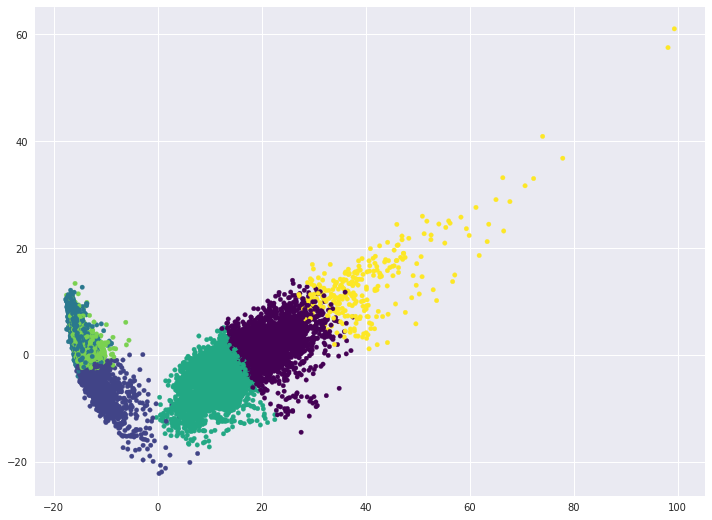

In [167]:
plt.scatter(X_pca[:, 0], X_pca[:, 1] , c=kMeans_cluster_labels, s=20,  cmap='viridis');

Посмотрите на соответствие между метками кластеров и исходными метками классов и на то, какие виды активностей алгоритм `KMeans` путает.

In [228]:
tab = pd.crosstab(y, kMeans_cluster_labels, margins=True).copy()
tab.index = ['ходьба', 'подъем вверх по лестнице', 
             'спуск по лестнице', 'сидение', 'стояние', 'лежание', 'все']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['все']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,все
ходьба,742,0,0,903,0,77,1722
подъем вверх по лестнице,295,2,0,1242,0,5,1544
спуск по лестнице,889,0,0,321,0,196,1406
сидение,0,451,91,1,1234,0,1777
стояние,0,566,0,0,1340,0,1906
лежание,0,330,1556,5,53,0,1944
все,1926,1349,1647,2472,2627,278,10299


Видим, что каждому классу (т.е. каждой активности) соответствуют несколько кластеров. Давайте посмотрим на максимальную долю объектов в классе, отнесенных к какому-то одному кластеру. Это будет простой метрикой, характеризующей, насколько легко класс отделяется от других при кластеризации. 

Пример: если для класса "спуск по лестнице", в котором 1406 объектов,  распределение кластеров такое:
 - кластер 1 – 900
 - кластер 3 – 500
 - кластер 6 – 6,
 
то такая доля будет 900 / 1406 $\approx$ 0.64.

In [232]:
maximum = [0, 'Что-то']
for columns in tab.columns:
  #print(columns) 
  if columns != 'все':
    i=0
    for cell in tab[columns].values:
#      print(cell, type(cell))
        i+=1
        if(cell !=0 and i<=6):
          a = int(cell / tab['все'][i-1] *100)
#          print(cell, '/', tab['все'][i-1], '* 100 =', cell / tab['все'][i-1], '* 100 =', a)
          if a >= maximum[0]:
            maximum[0] = a
            maximum[1] = tab.index[i-1]  
maximum

[80, 'подъем вверх по лестнице']

**Вопрос 4:**<br>
Какой вид активности отделился от остальных лучше всего в терминах простой  метрики, описанной выше?<br>

**Ответ:**
- ходьба
- стояние
- спуск по лестнице
- **перечисленные варианты не подходят**

Видно, что kMeans не очень хорошо отличает только активности друг от друга. Используйте метод локтя, чтобы выбрать оптимальное количество кластеров. Параметры алгоритма и данные используем те же, что раньше, меняем только `n_clusters`.

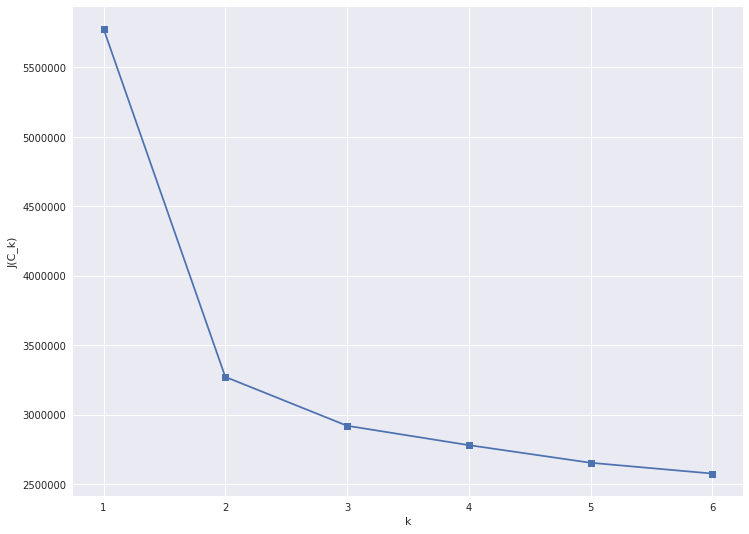

In [171]:
inertia = []

for k in range(1, n_classes + 1):
    kmeans_temporary = KMeans(n_clusters=k , n_init=100, random_state=RANDOM_STATE).fit(X_pca)
    inertia.append( kmeans_temporary.inertia_ )
    
plt.plot(range(1, n_classes + 1), inertia, marker='s');
plt.xlabel('k')
plt.ylabel('J(C_k)');

In [223]:
d = {}
for k in range(2, 6):
    i = k - 1
    d[k] = (inertia[i] - inertia[i + 1]) / (inertia[i - 1] - inertia[i])
d

{2: 0.14043741367369986,
 3: 0.3964883556077661,
 4: 0.9091910941721,
 5: 0.6130344080474414}

**Вопрос 5:**<br>
Какое количество кластеров оптимально выбрать, согласно методу локтя?<br>

**Ответ:**
- 1
- **2**
- 3
- 4

------------------------

Попробуем еще один метод кластеризации, который описывался в статье – агломеративную кластеризацию.

In [0]:
ag = AgglomerativeClustering(n_clusters=n_classes, 
                             linkage='ward').fit(X_pca)
ag_cluster_labels = ag.labels_

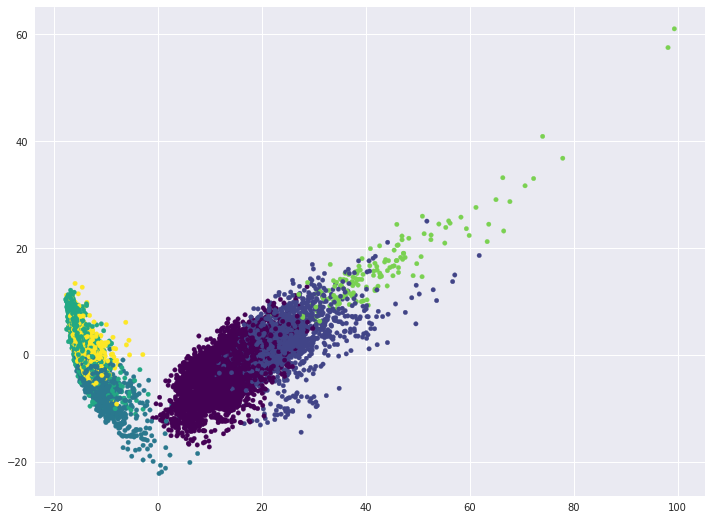

In [173]:
plt.scatter(X_pca[:, 0], X_pca[:, 1] , c=ag_cluster_labels, s=20,  cmap='viridis');

Посчитайте Adjusted Rand Index (`sklearn.metrics`) для получившегося разбиения на кластеры и для `KMeans` с параметрами из задания к 4 вопросу.

In [235]:
print('KMeans:', metrics.adjusted_rand_score(y, kMeans_cluster_labels))
print('AC:', metrics.adjusted_rand_score(y, ag_cluster_labels ))

KMeans: 0.419224271062724
AC: 0.4598748901093879


**Вопрос 6:**<br>
Отметьте все верные утверждения.<br>

**Варианты:**
- **Согласно ARI, KMeans справился с кластеризацией хуже, чем Agglomerative Clustering**
- **Для ARI не имеет значения какие именно метки присвоены кластерам, имеет значение только разбиение объектов на кластеры**
- **В случае случайного разбиения на кластеры ARI будет близок к нулю**

-------------------------------

Можно заметить, что задача не очень хорошо решается именно как задача кластеризации, если выделять несколько кластеров (> 2). Давайте теперь решим задачу классификации, вспомнив, что данные у нас размечены.  

Для классификации используйте метод опорных векторов – класс `sklearn.svm.LinearSVC`. Мы в курсе отдельно не рассматривали этот алгоритм, но он очень известен, почитать про него можно, например, в материалах Евгения Соколова –  [тут](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem11_linear.pdf). 

Настройте для `LinearSVC` гиперпараметр `C` с помощью `GridSearchCV`. 

- Обучите новый `StandardScaler` на обучающей выборке (со всеми исходными признаками), примените масштабирование к тестовой выборке
- В `GridSearchCV` укажите  cv=3.

In [0]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [0]:
svc = LinearSVC(random_state=RANDOM_STATE)
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [273]:
best_svc = GridSearchCV( svc, svc_params, cv=3)
best_svc.fit(X_train_scaled, y_train)
print("Best params:", best_svc.best_params_)

best_score_SVC = best_svc.best_score_

Best params: {'C': 0.1}


**Вопрос 7**<br>
Какое значение гиперпараметра `C` было выбрано лучшим по итогам кросс-валидации?<br>

**Ответ:**
- 0.001
- 0.01
- **0.1**
- 1
- 10

In [0]:
y_predicted = best_svc.predict(X_test_scaled)

In [182]:
tab = pd.crosstab(y_test, y_predicted, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице', 
             'сидение', 'стояние', 'лежание', 'все']
tab.columns = ['pred_ходьба', 'pred_подъем вверх по лестнице', 'pred_спуск по лестнице', 
             'pred_сидение', 'pred_стояние', 'pred_лежание', 'pred_все']
tab

,pred_ходьба,pred_подъем вверх по лестнице,pred_спуск по лестнице,pred_сидение,pred_стояние,pred_лежание,pred_все
ходьба,479,11,4,2,0,0,496
подъем вверх по лестнице,4,465,1,1,0,0,471
спуск по лестнице,1,2,416,1,0,0,420
сидение,0,4,0,433,52,2,491
стояние,0,0,0,16,516,0,532
лежание,0,0,0,0,6,531,537
все,484,482,421,453,574,533,2947


In [192]:
fulness = []
accuracity = []
for i in range(0,6):
  fulness.append( round( tab[tab.columns[i]][i] / tab['pred_все'][i] ,2) )
  accuracity.append( round( tab[tab.columns[i]][i] / tab[tab.columns[i]][6] ,2) )
  
print('Наихудший по точности:', tab.index[accuracity.index(min(accuracity))])
print('Наихудший по полноте:', tab.index[fulness.index(min(fulness))])

Наихудший по точности: стояние
Наихудший по полноте: сидение


**Вопрос 8:**<br>
Какой вид активности SVM определяет хуже всего в терминах точности? Полноты? <br>

**Ответ:**
- по точности – подъем вверх по лестнице, по полноте – лежание
- по точности – лежание, по полноте – сидение
- по точности – ходьба, по полноте – ходьба
- **по точности – стояние, по полноте – сидение **

Наконец, проделайте то же самое, что в 7 вопросе, только добавив PCA.

- Используйте выборки `X_train_scaled` и `X_test_scaled`
- Обучите тот же PCA, что раньше, на отмасшабированной обучающей выборке, примените преобразование к тестовой
- Настройте гиперпараметр `C` на кросс-валидации по обучающей выборке с PCA-преобразованием. Вы заметите, насколько это проходит быстрее, чем раньше.


In [279]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.9, random_state=RANDOM_STATE)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svc = LinearSVC(random_state=RANDOM_STATE)

best_svc_pca = GridSearchCV(svc, svc_params, n_jobs=1, cv=3)
best_svc_pca.fit(X_train_pca, y_train);
print('Best params:', best_svc_pca.best_params_)

best_score_PCA = best_svc_pca.best_score_

Best params: {'C': 0.1}


In [280]:
print('Разница между PCA и SVC:')
print( round(best_score_PCA,2), '-',round(best_score_SVC,2),'=', round(np.fabs(best_score_SVC - best_score_PCA)*100)) 

Разница между PCA и SVC:
0.9 - 0.94 = 4.0


**Вопрос 9:**<br>
Какова разность между лучшим качеством (долей верных ответов) на кросс-валидации в случае всех 561 исходных признаков и во втором случае, когда применялся метод главных компонент? Округлите до целых процентов.<br>

**Варианты:**
- Качество одинаковое
- 2%
- **4% **
- 10%
- 20%

**Вопрос 10:**<br>
Выберите все верные утверждения:

**Варианты:**
- Метод главных компонент в данном случае позволил уменьшить время обучения модели, при этом качество (доля верных ответов на кросс-валидации) очень пострадало, более чем на 10%
- **PCA можно использовать для визуализации данных, однако для этой задачи есть и лучше подходящие методы, например, tSNE. Зато PCA имеет меньшую вычислительную сложность**
- **PCA строит линейные комбинации исходных признаков, и в некоторых задачах они могут плохо интерпретироваться человеком**

![alt text](https://pp.userapi.com/c845324/v845324524/c2635/vKIQCBqtztU.jpg)